In [6]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [7]:
dt = 0.001
t = np.arange(0,1,dt)
n = len(t)
w = 2*np.pi*np.array([50,120,220])
f = np.sum(np.sin(w[:, None]*t), 0)
fn = f + 3*np.random.randn(n)

h = np.fft.fft(fn, n)
PSD = h*np.conj(h)/n
freq = (1/(dt*n))*np.arange(n)

PSD0 = np.where(PSD<100, 0, PSD)
h = np.where(PSD<100, 0, h)
H = np.fft.ifft(h)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


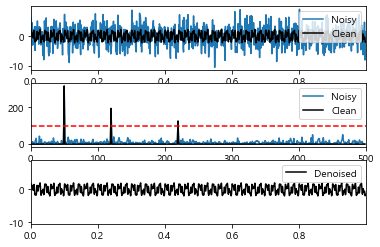

In [9]:
fig, ax = plt.subplots(3,1)
ax[0].plot(t, fn, label='Noisy')
ax[0].plot(t, f, c='k', label='Clean')
ax[0].set_xlim(t[0], t[-1])
ax[0].legend(loc=1)

m = n//2
ax[1].plot(freq[:m], PSD[:m], label='Noisy')
ax[1].plot(freq[:m], PSD0[:m], c='k', label='Clean')
ax[1].axhline(100, ls='--', c='r')
ax[1].set_xlim(freq[0], freq[m])
ax[1].legend(loc=1)

ax[2].plot(t, H, c='k', label='Denoised')
ax[2].set_xlim(t[0], t[-1])
ax[2].set_ylim(fn.min(), fn.max())
ax[2].legend(loc=1)

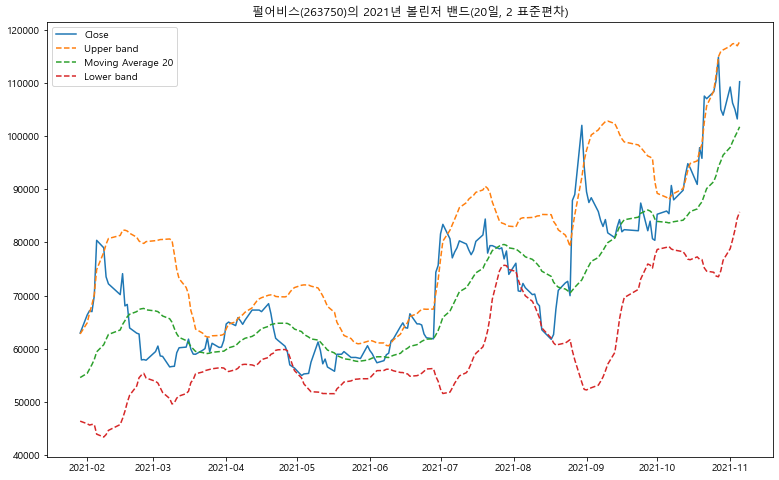

In [19]:
name = '펄어비스'
fromdate = str(20210101)
todate = str(20211107)

ticker = stock_list.loc[stock_list['종목명']==name, '종목코드']
df = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker)


df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음


plt.figure(figsize=(13, 8))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{name}({int(ticker.values)})의 2021년 볼린저 밴드(20일, 2 표준편차)')
plt.legend(loc='best');
plt.show()

In [20]:
df['volatility'] = df['upper'] - df['lower']
df.head()

,Open,High,Low,Close,Volume,ma20,stddev,upper,lower,volatility
날짜,,,,,,,,,,
2021-01-29,64740,64980,61460,62980,153018,54624.0,4097.375797,62818.751594,46429.248406,16389.503188
2021-02-01,63199,68800,62680,66400,118030,55424.0,4740.715469,64905.430938,45942.569062,18962.861876
2021-02-02,66600,67880,65220,67200,76184,56251.0,5278.123570,66807.247140,45694.752860,21112.494280
2021-02-03,67100,67600,65700,67000,64282,57065.0,5624.244043,68313.488086,45816.511914,22496.976171
2021-02-04,66400,70000,66320,70000,71631,58025.0,6115.735959,70256.471917,45793.528083,24462.943835


In [21]:
t = df['Close']
n = len(t)
fn = df['Close']

h = np.fft.fft(fn, n)
PSD = h*np.conj(h)/n
freq = (1/(dt*n))*np.arange(n)

PSD0 = np.where(PSD<100, 0, PSD)
h = np.where(PSD<100, 0, h)
H = np.fft.ifft(h)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


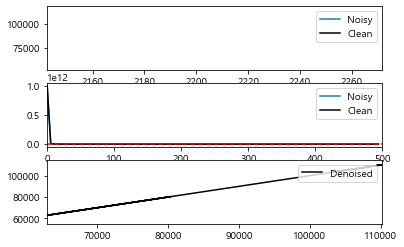

In [22]:
fig, ax = plt.subplots(3,1)
ax[0].plot(t, label='Noisy')
ax[0].plot(fn, c='k', label='Clean')
ax[0].set_xlim(t[0], t[-1])
ax[0].legend(loc=1)

m = n//2
ax[1].plot(freq[:m], PSD[:m], label='Noisy')
ax[1].plot(freq[:m], PSD0[:m], c='k', label='Clean')
ax[1].axhline(100, ls='--', c='r')
ax[1].set_xlim(freq[0], freq[m])
ax[1].legend(loc=1)

ax[2].plot(t, H, c='k', label='Denoised')
ax[2].set_xlim(t[0], t[-1])
ax[2].set_ylim(fn.min(), fn.max())
ax[2].legend(loc=1)

In [14]:
h

array([ 2.40087800e+07+0.00000000e+00j,  1.49068381e+06+3.89721817e+06j,
        6.85676092e+05+1.31104062e+06j,  1.33643964e+05+2.13760871e+06j,
        3.26944268e+04+8.93446128e+05j,  5.93986009e+05+9.15288480e+05j,
        3.17097857e+05+8.08595824e+05j,  1.92520261e+05+1.07292939e+06j,
       -1.31405891e+05+6.49074494e+05j,  4.26475606e+04+7.47139685e+04j,
        2.80105230e+05+5.36282988e+05j, -8.10813850e+03+3.58210049e+05j,
        4.68561875e+05+6.30944421e+05j, -2.15398891e+05+7.66322352e+05j,
       -1.46415730e+05+4.40887293e+05j, -2.74360036e+05+5.35742611e+05j,
       -1.24367427e+05+2.58624192e+05j, -9.54247814e+04+3.62971234e+05j,
       -1.34489160e+05+6.40327719e+04j,  1.12068959e+05+2.19187872e+05j,
        2.25353570e+04+2.76976653e+05j, -7.59887663e+03+1.28862810e+05j,
        6.77359283e+03+4.34808244e+05j, -1.71170980e+05+3.11056360e+05j,
       -1.74406790e+05+1.96533641e+05j, -2.17660320e+05+1.49286510e+05j,
       -2.02829987e+04+6.72911926e+04j, -9.82723392